In [1]:
import matplotlib.pyplot as plt
import numpy as np


from aart_func import *
import params
from params import * # The file params.py contains all the relevant parameters for the simulations
from astropy import units as u
import kgeo
import image_tools as tls
import subprocess
import scipy.interpolate
import bigRunComputing
from matplotlib import ticker
from matplotlib.lines import Line2D

%load_ext autoreload
%autoreload 2
import importlib 
from functools import partial

Welcome to eht-imaging! v 1.2.5 


/tmp/ipykernel_214850/3635298951.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(2, 3, 3)
/tmp/ipykernel_214850/3635298951.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax3 = plt.subplot(2, 3, 6)


[]

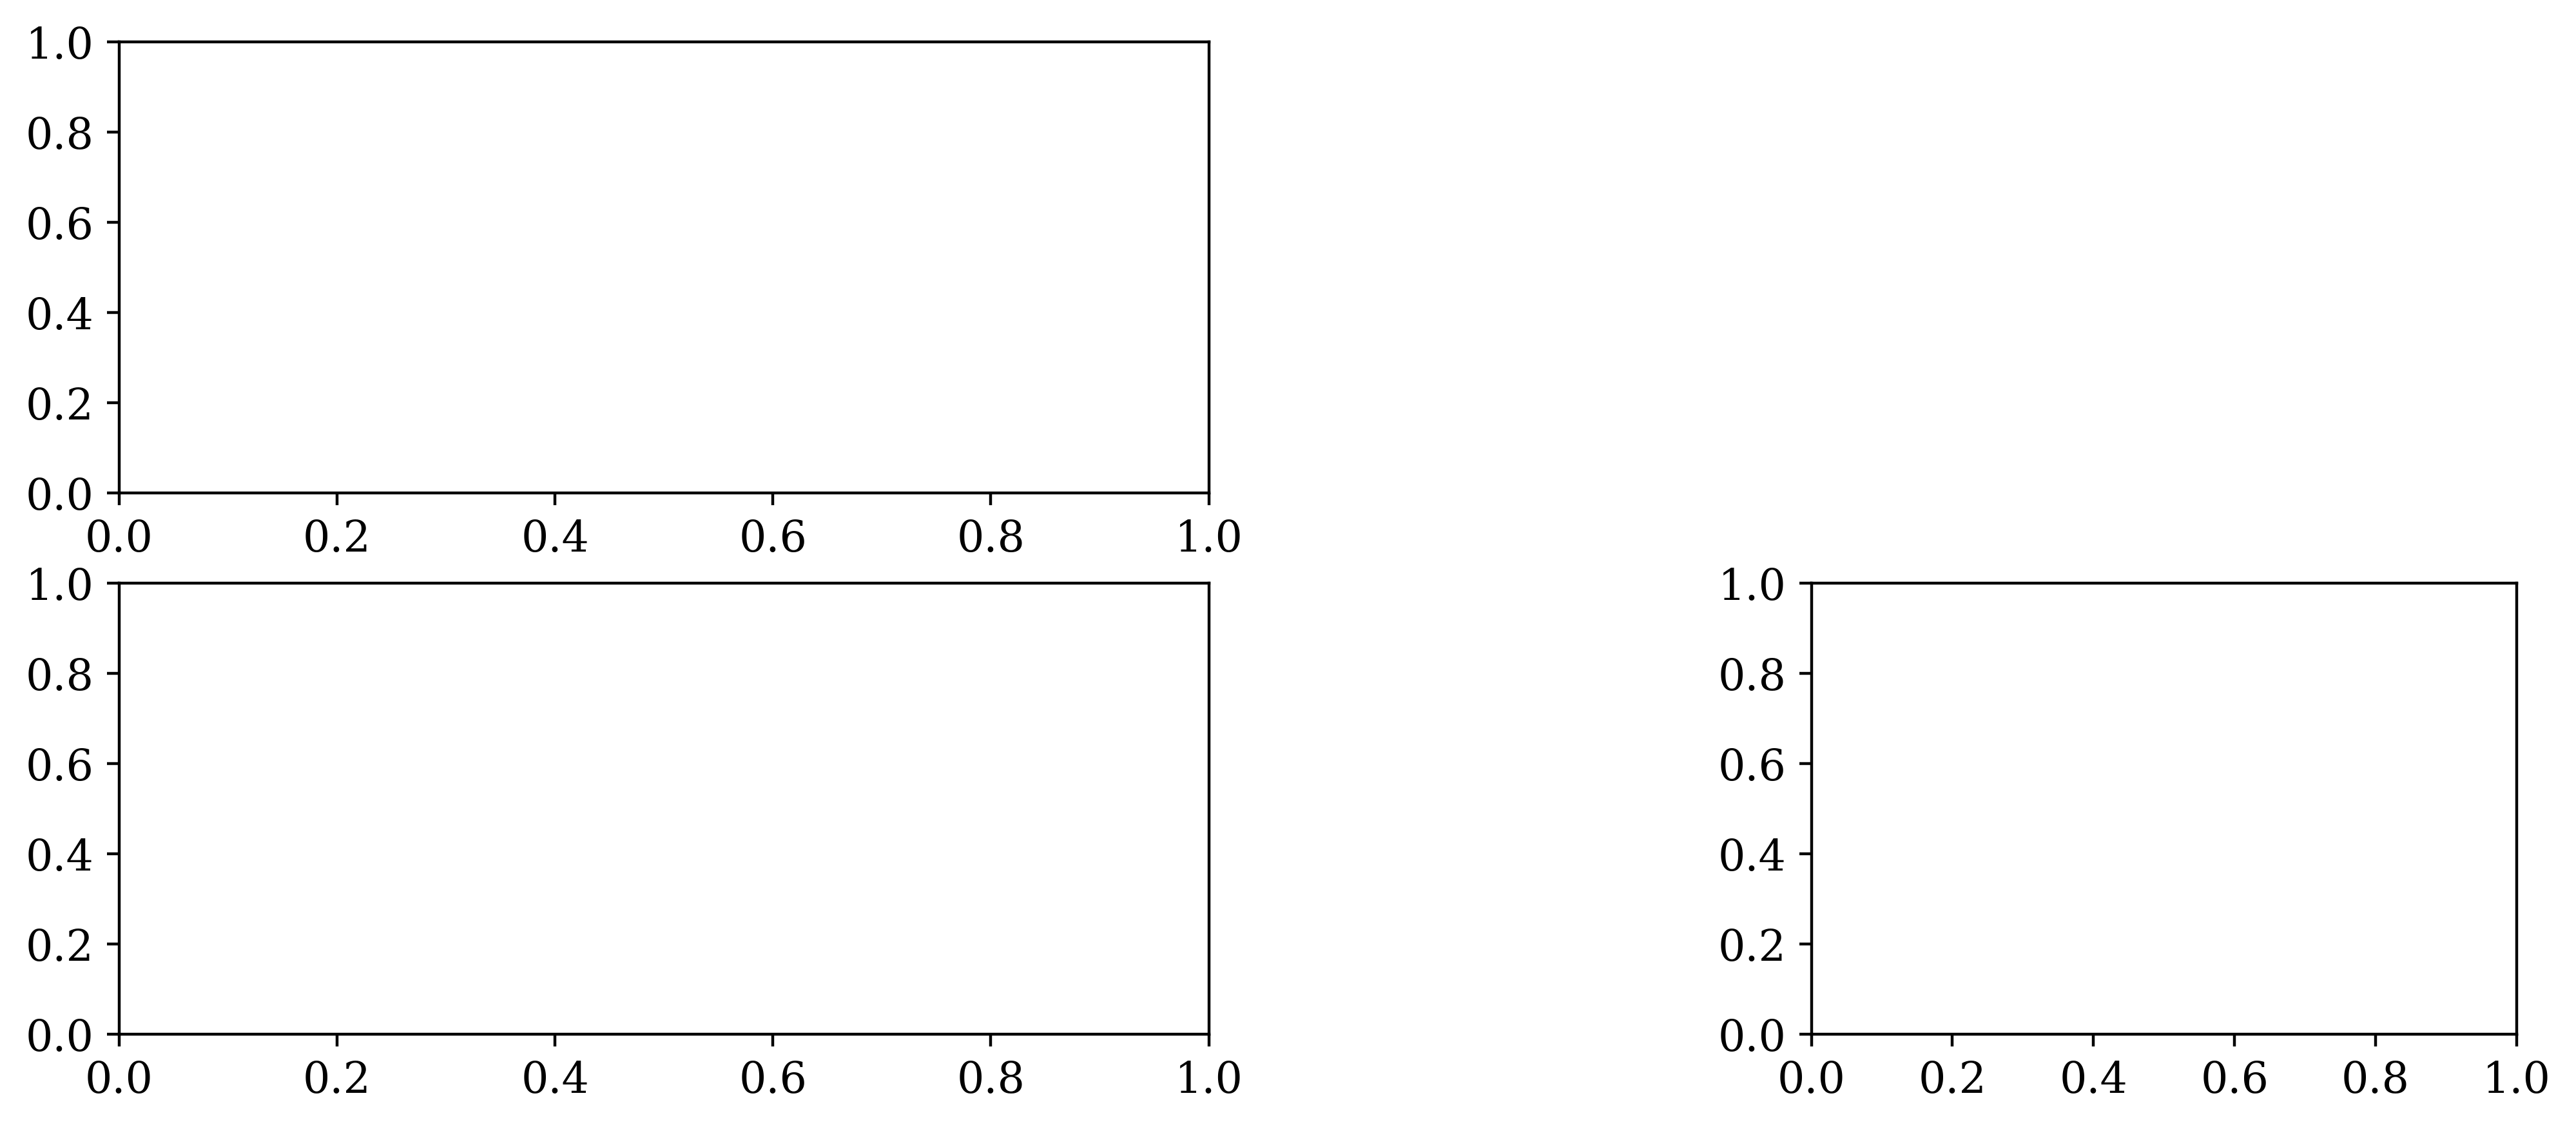

In [4]:
fig, dum = plt.subplots(2, 2, figsize=[12,5], dpi=400)
ax0 = plt.subplot(2, 2, 1)
ax1 = plt.subplot(2, 3, 3)
ax2 = plt.subplot(2, 2, 3)
ax3 = plt.subplot(2, 3, 6)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.get_xaxis().set_ticks([])
ax1.get_yaxis().set_ticks([])

In [45]:
t = np.zeros(3)
t[2] = 100
t = np.vstack((t,np.array([2,2,2])))
print(t)
# print("_________")
# t = np.delete(t,0,0)
# print(t)
peak = np.argmax(t,1)
print(np.argmax(peak==0))
if not np.all((peak==0) == False):
    print("Not All False")
peak = np.delete(peak,np.argmax(peak==0))
print(peak)

[[  0.   0. 100.]
 [  2.   2.   2.]]
1
Not All False
[2]


Text(0, 0.5, 'Frequency')

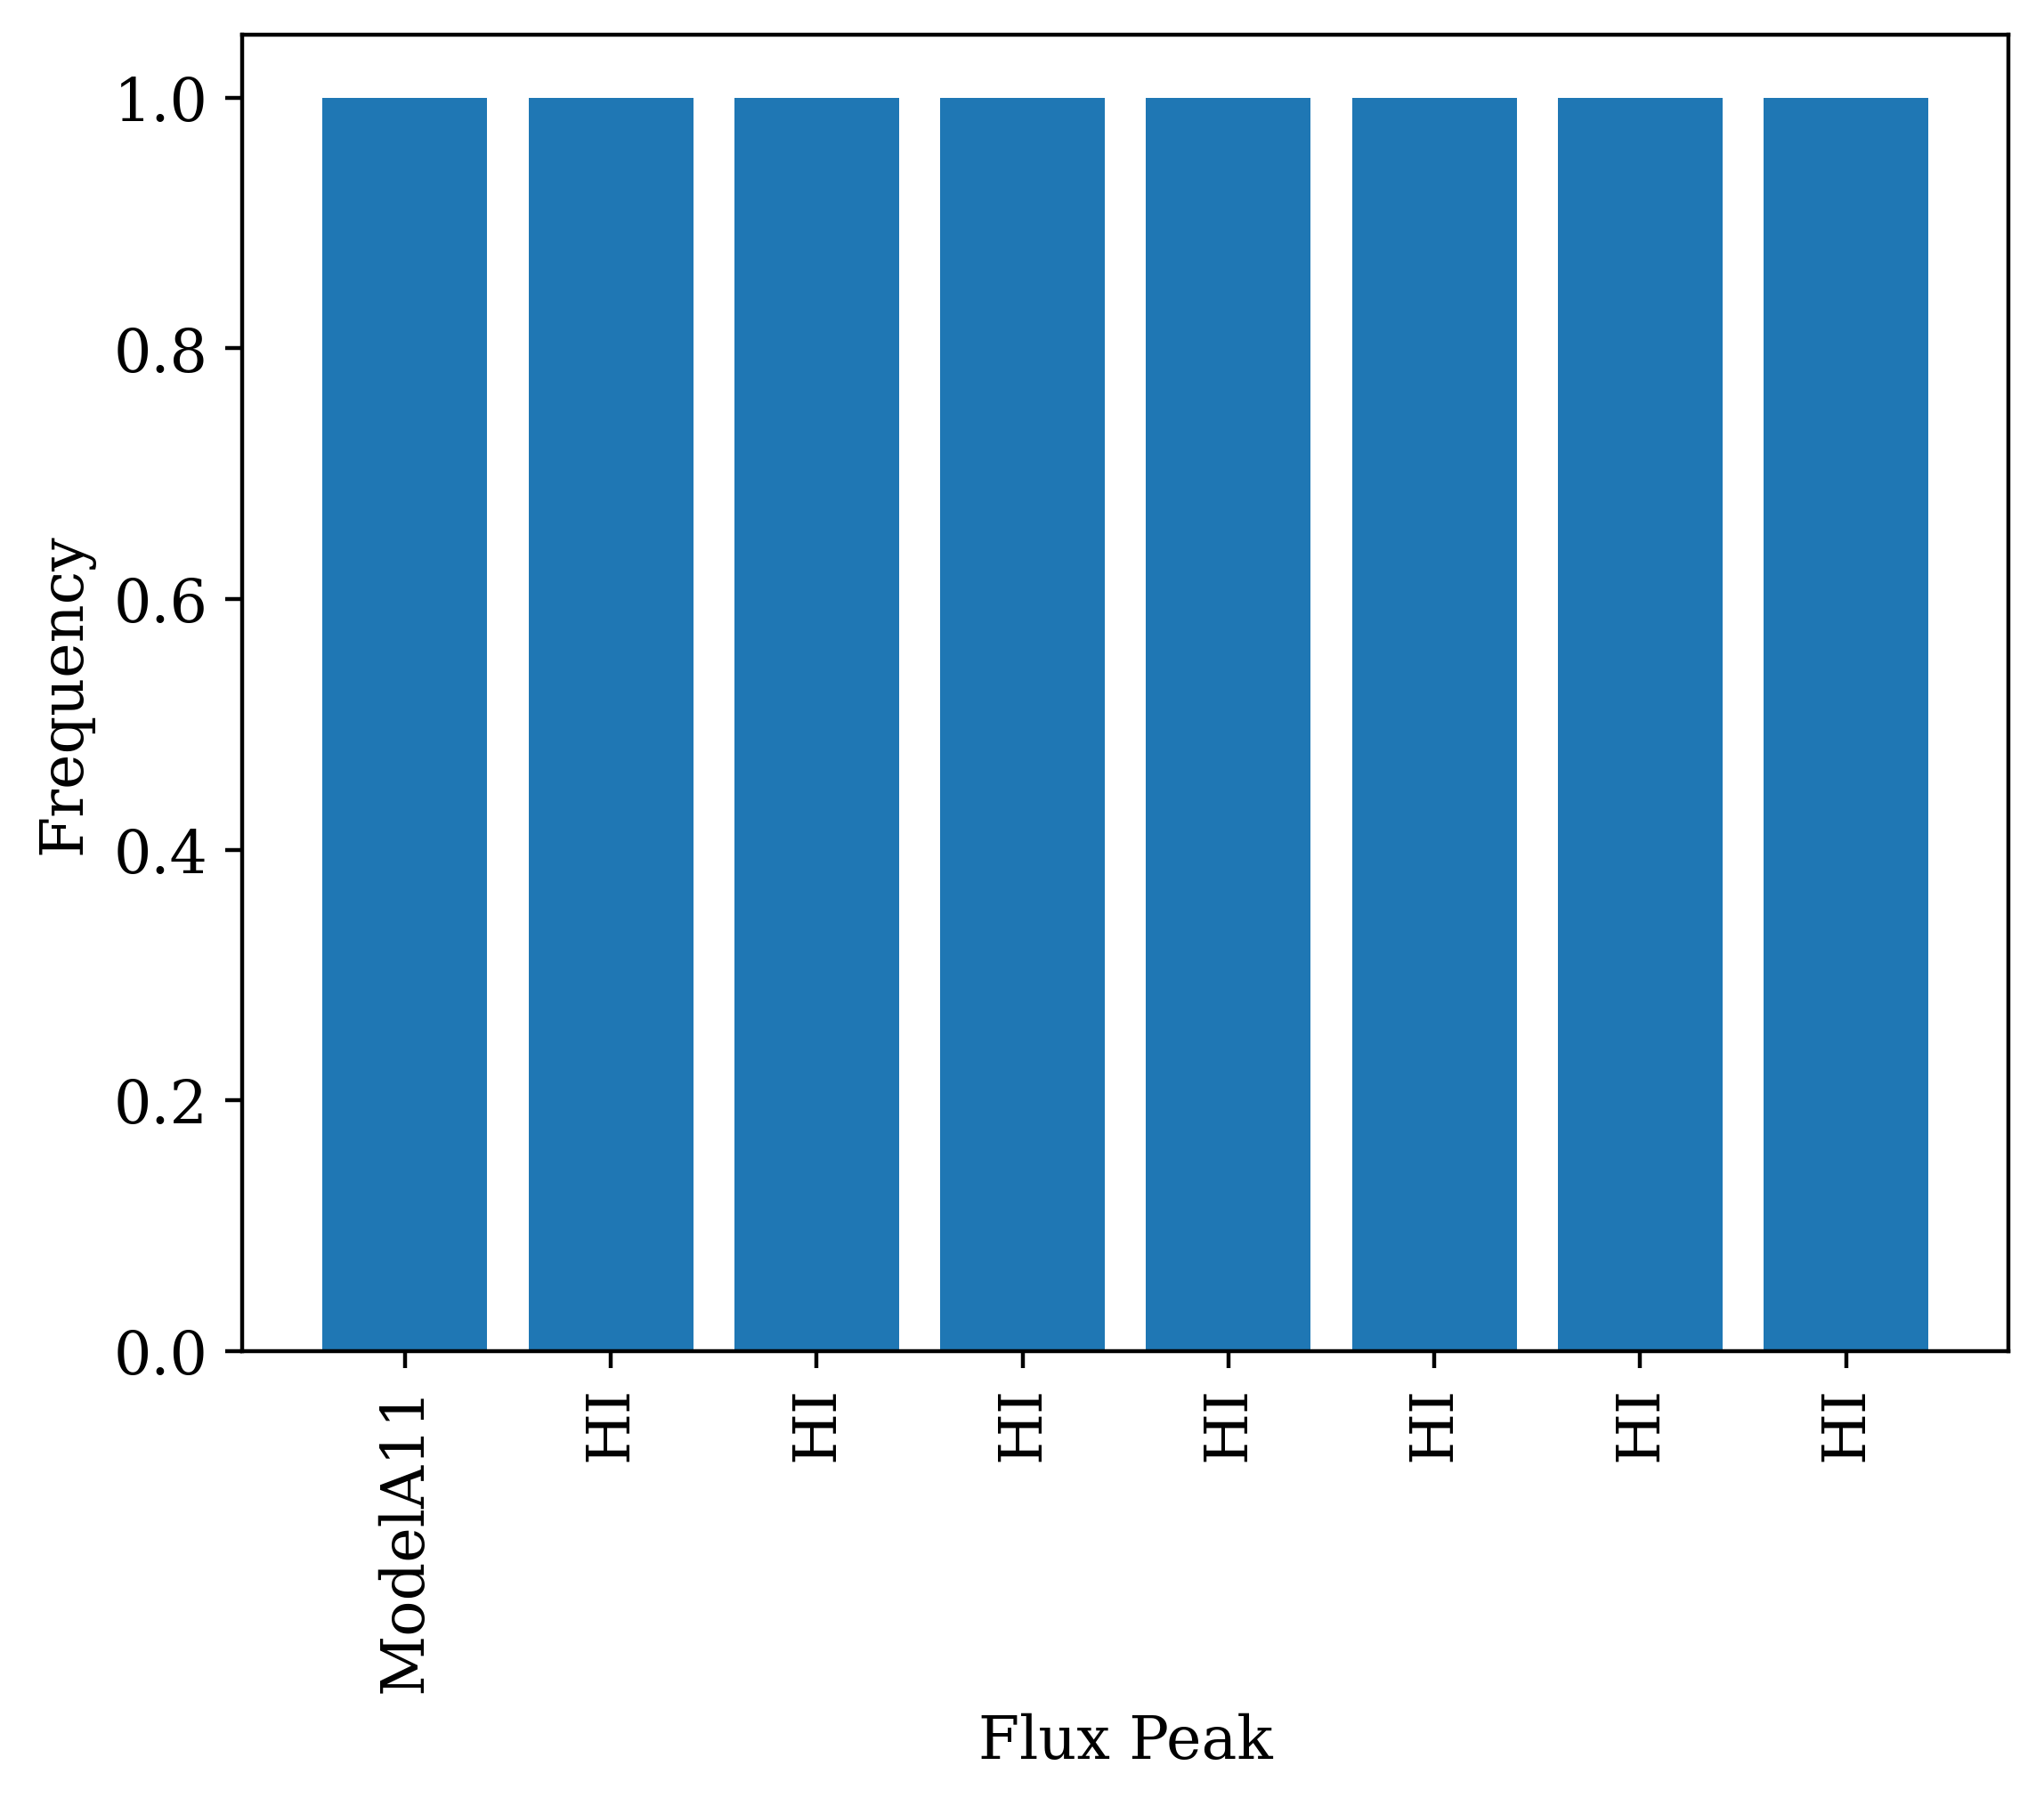

In [5]:
xdata = [1,2,3,4,5,6,7,8]
ydata = [1,1,1,1,1,1,1,1]
fig, ax = plt.subplots(1, 1, dpi=400)
ax.bar(xdata,ydata)
plt.xticks(xdata, labels=["ModelA11","HI","HI","HI","HI","HI","HI","HI"],rotation=90)
ax.set_xlabel("Flux Peak")
ax.set_ylabel("Frequency")


[array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.]), array([3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.]), array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])]
(30, 4)


Text(0.5, 0, 'Mean I0 Radii')

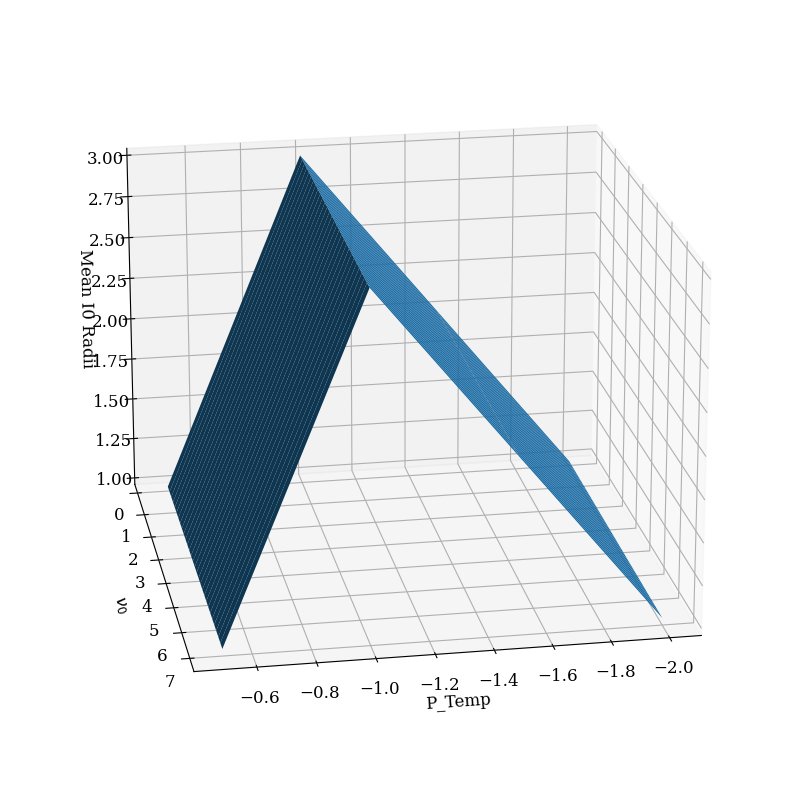

In [66]:
x = [-2,-1.5,-1,-0.5] # p_temp
y = np.linspace(10 * 10 ** 9, 700 *10 **9,30) # nu

test1 = np.ones(30) 
test2 = np.ones(30) * 2
test3 = np.ones(30) * 3
test4 = np.ones(30) * 1

X,Y = np.meshgrid(x,y)
print([test1,test2,test3,test4])
Z = np.array([test1,test2,test3,test4]).T
Z.shape # shape = [len(y),len(x)]
print(X.shape)
fig, ax = plt.subplots(figsize=[10,10],subplot_kw={"projection": "3d"})
ax.plot_surface(X,Y,Z)

ax.view_init(20, 80) 
ax.set_xlabel("P_Temp")
ax.set_ylabel(R"$\nu_0$")
ax.set_zlabel("Mean I0 Radii", rotation=90)
# ax.set_xscale('log')
# ax.set_yscale('log')
# ax.yaxis.set_scale('log')
# 
# ax.set_xlim([np.min(X) * 1/10,np.max(X) * 10])


In [49]:
t = "ModelA21"
print(t[len(t)-3])
print(t[(5+1)])

t = ["ModelA11","ModelA12","ModelA13","ModelA21","ModelA22","ModelA23"]
print(bigRunComputing.regexSearch("ModelA2",t))

A
2
['ModelA21', 'ModelA22', 'ModelA23']
